                                                 heading  textblob_sentiment  \
0      Ahead of winter session, acoustics, furniture ...            0.118182   
1      At least 6 dead, say officials, as 2 trains co...           -0.250000   
2      Man claiming to be behind Kochi blasts says Je...           -0.400000   
3      Police inspector in critical condition after b...            0.000000   
4      ‘Saw a fireball near my sister’s seat’: Eyewit...            0.100000   
...                                                  ...                 ...   
12484  India Inc turns IT centric, hires more tech wo...            0.250000   
12485  Tata-Wistron deal will build on contract mfg b...           -0.800000   
12486  Sachin Vaze planting gelatin sticks near Amban...            0.081250   
12487  From ‘I’ll be back’ to ‘a video that was not m...            0.150000   
12488  Water to be sprinkled on Shivaji Park ground d...            0.000000   

      textblob_sentiment_category  
0  

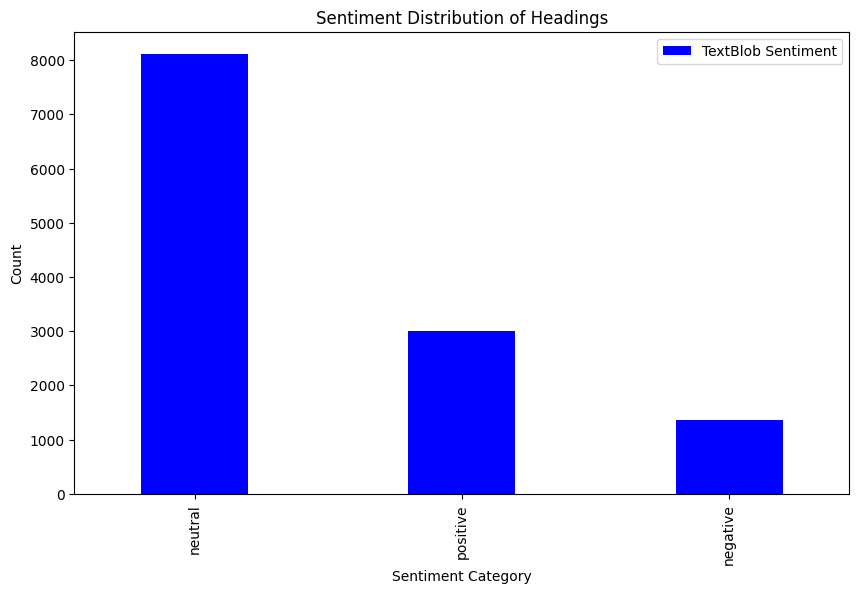

In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from string import punctuation


df = pd.read_csv('output (2).csv')

def preprocess_text(text):
    
    text = str(text).lower()
    text = ''.join([char for char in text if char not in punctuation])
    return text

def get_textblob_sentiment(text):
    if pd.isna(text):
        return 0
    analysis = TextBlob(preprocess_text(text))
    return analysis.sentiment.polarity

df['textblob_sentiment'] = df['heading'].apply(get_textblob_sentiment)


def categorize_sentiment(sentiment_score):
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

df['textblob_sentiment_category'] = df['textblob_sentiment'].apply(categorize_sentiment)

print(df[['heading', 'textblob_sentiment', 'textblob_sentiment_category']])

plt.figure(figsize=(10, 6))

df['textblob_sentiment_category'].value_counts().plot(kind='bar', color='blue', width=0.4, label='TextBlob Sentiment')

plt.title('Sentiment Distribution of Headings')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.legend()
plt.show()
